### d) Gráficos exploratorios

In [1]:
# Leer data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Para complementar analisis exploratorio
import seaborn as sns
# Para clustering
import random, sklearn, pyclustertend

data_final = pd.read_csv('data_final.csv', encoding="latin-1")

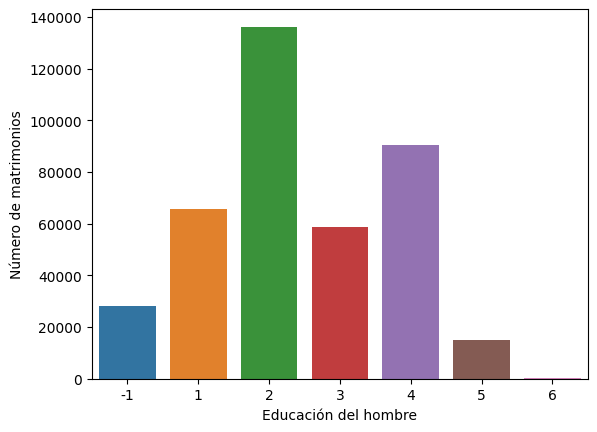

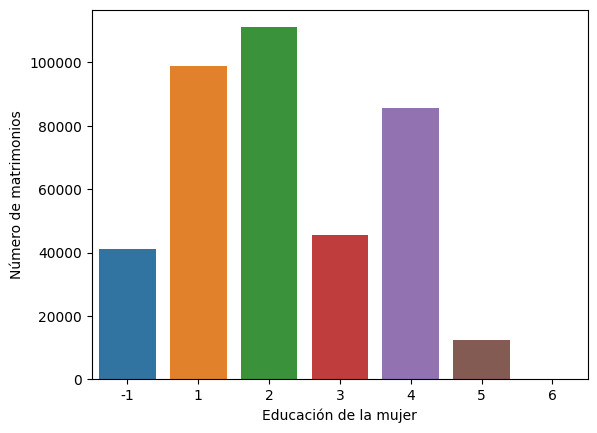

In [2]:
# Distribución de la educación y ocupación de los hombres y mujeres en los matrimonios registrados en zonas rurales o comunidades indígenas
sns.countplot(x='educacionHombre', data=data_final)
plt.xlabel('Educación del hombre')
plt.ylabel('Número de matrimonios')
plt.show()

sns.countplot(x='educacionMujer', data=data_final)
plt.xlabel('Educación de la mujer')
plt.ylabel('Número de matrimonios')
plt.show()

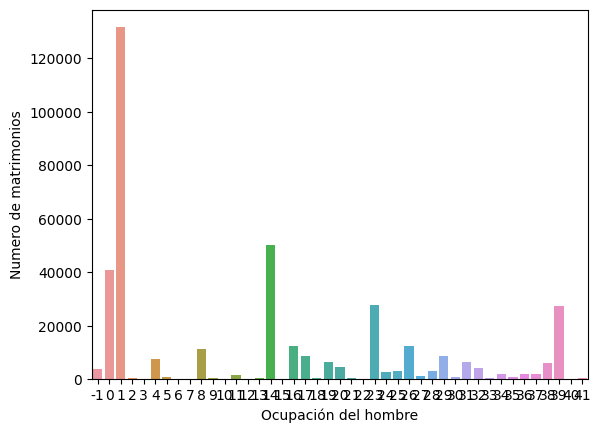

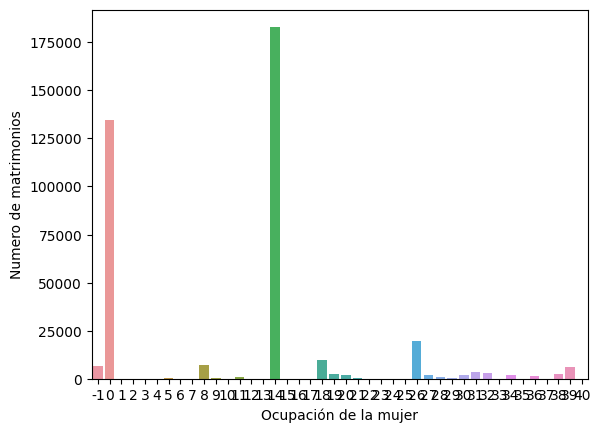

In [38]:
sns.countplot(x='ocupacionHombre', data=data_final)
plt.xlabel('Ocupación del hombre')
plt.ylabel('Numero de matrimonios')
plt.show()

sns.countplot(x='ocupacionMujer', data=data_final)
plt.xlabel('Ocupación de la mujer')
plt.ylabel('Numero de matrimonios')
plt.show()

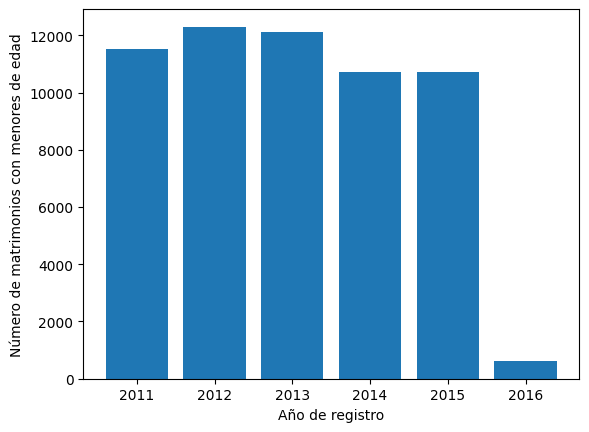

In [39]:
# Cantidad de matrimonios con menores de edad por año
df_temp = data_final.copy()

df_temp['conMenores'] = ((df_temp['edadHombre'] < 18) | (df_temp['edadMujer'] < 18)).astype(int)
new_df = df_temp.groupby('anioRegistro')['conMenores'].sum().reset_index()

plt.bar(new_df['anioRegistro'], new_df['conMenores'])
plt.xlabel('Año de registro')
plt.ylabel('Número de matrimonios con menores de edad')
plt.show()

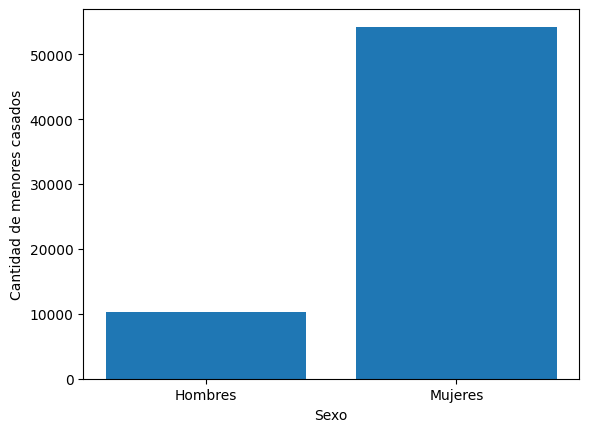

In [40]:
# Cantidad de hombres y mujeres casados menores de 18 años
men = data_final[data_final['edadHombre'] < 18]
women = data_final[data_final['edadMujer'] < 18]

plt.bar(["Hombres", "Mujeres"], [len(men), len(women)])
plt.xlabel('Sexo')
plt.ylabel('Cantidad de menores casados')
plt.show()

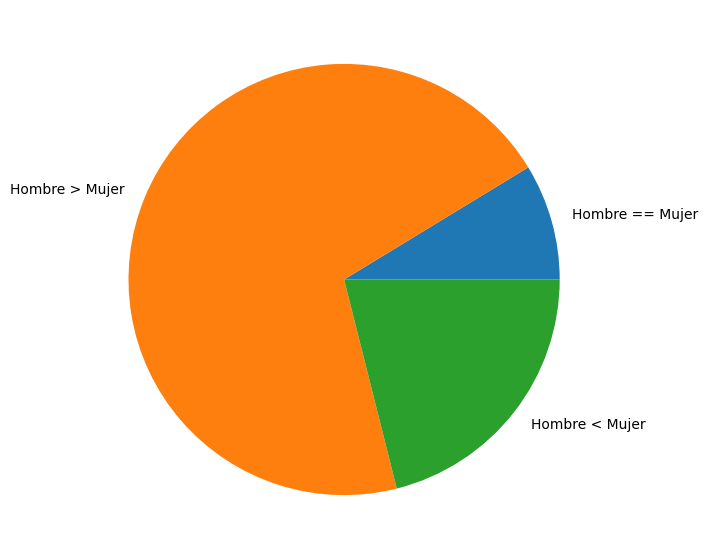

In [41]:
# Porcentaje de matrimonios donde uno es menor de edad
same_age = data_final[data_final['edadHombre'] == data_final['edadMujer']]

man_upper = data_final[data_final['edadHombre'] > data_final['edadMujer']]

woman_upper = data_final[data_final['edadHombre'] < data_final['edadMujer']]

labels = ["Hombre == Mujer", "Hombre > Mujer", "Hombre < Mujer"]

data = [len(same_age), len(man_upper), len(woman_upper)]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
 
plt.show() # show plot

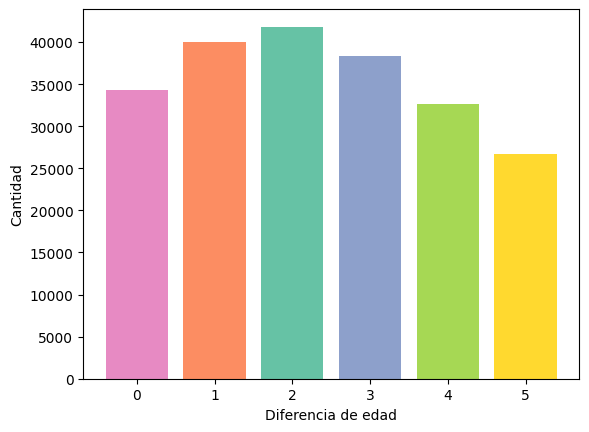

In [42]:
# Cantidad de diferencia de edad
df_temp = data_final.copy()

df_temp['difference'] = df_temp["edadHombre"] - df_temp["edadMujer"]
df_temp = df_temp[df_temp['difference'] >= 0].sort_values(by='difference', ascending=True)
result = df_temp['difference'].value_counts().head(6)

palette = sns.color_palette('Set2', n_colors=len(result))

plt.bar(result.index, result.values, color=palette)
plt.xlabel('Diferencia de edad')
plt.ylabel('Cantidad')
plt.show()

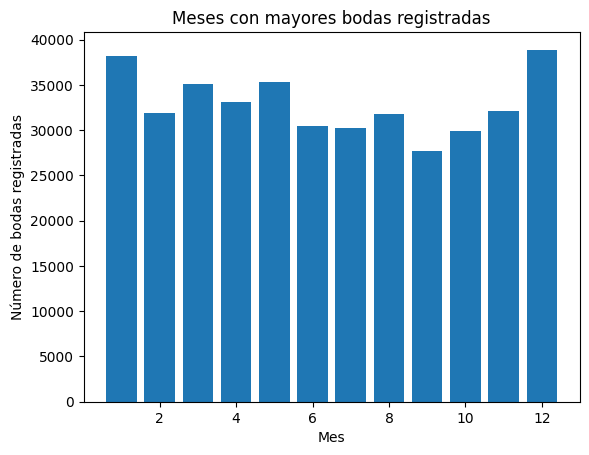

In [43]:
# Meses con mayores bodas registradas
result = data_final['mesRegistro'].value_counts()

plt.bar(result.index, result.values)
plt.xlabel('Mes')
plt.ylabel('Número de bodas registradas')
plt.title('Meses con mayores bodas registradas')
plt.show()

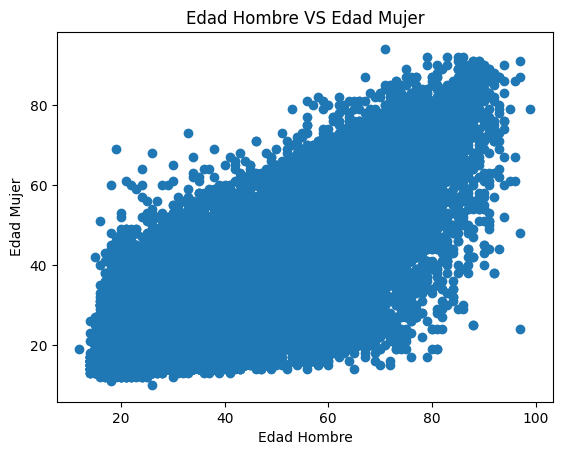

In [19]:
# Dispersion entre las edades de los hombres y mujeres que estan casados
x = data_final['edadHombre'].to_list()
y = data_final['edadMujer'].to_list()

plt.scatter(x, y)
plt.xlabel('Edad Hombre')
plt.ylabel('Edad Mujer')
plt.title('Edad Hombre VS Edad Mujer')
plt.show()

Como se puede observar la tendencia esta en que la mayoria de los hombres que se casan son mucho mayores que las mujeres.

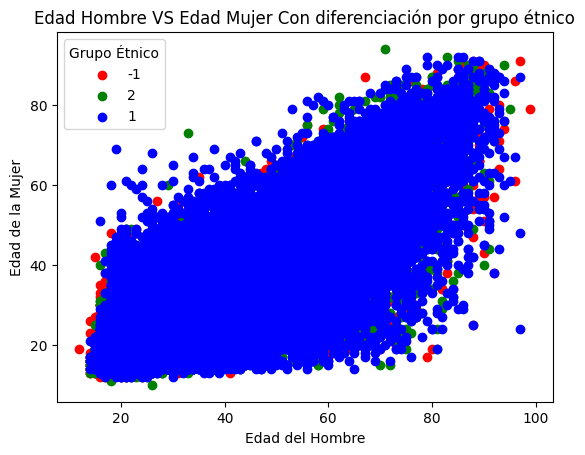

In [20]:
# Ahora tomando en cuenta la diferenciación por grupo étnico
df_diff = data_final[['edadHombre', 'edadMujer', 'grupoEtnicoHombre', 'grupoEtnicoMujer']]

fig, ax = plt.subplots()

colors = ['red', 'green', 'blue']  # Definir una lista de colores
groups = data_final['grupoEtnicoHombre'].unique()  # Obtener los grupos étnicos únicos

for i, group in enumerate(groups):
    # Filtrar los datos para el grupo étnico actual
    data_group = data_final[data_final['grupoEtnicoHombre'] == group]
    
    # Graficar los puntos del grupo étnico actual
    ax.scatter(data_group['edadHombre'], data_group['edadMujer'], color=colors[i], label=group)

ax.legend(title='Grupo Étnico')
ax.set_title('Edad Hombre VS Edad Mujer Con diferenciación por grupo étnico')
ax.set_xlabel('Edad del Hombre')
ax.set_ylabel('Edad de la Mujer')
plt.show()

Se puede ver que suele existir un dominio con el grupo etnico "Mestizo"

/home/clay/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


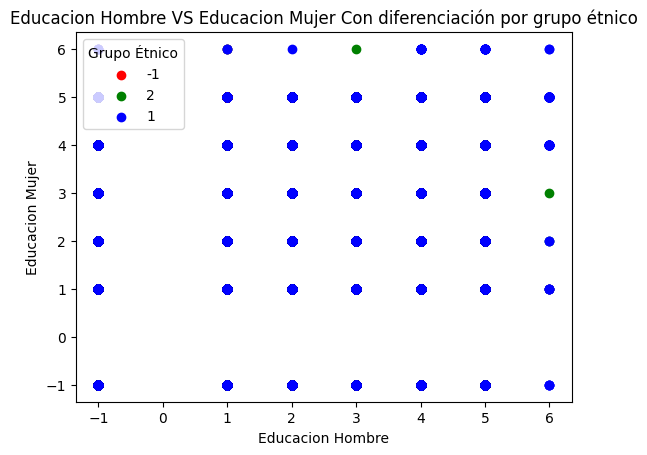

In [21]:
# Ahora tomando en cuenta la diferenciación por grupo étnico
df_diff = data_final[['educacionHombre', 'educacionMujer', 'grupoEtnicoHombre', 'grupoEtnicoMujer']]

fig, ax = plt.subplots()

colors = ['red', 'green', 'blue']  # Definir una lista de colores
groups = data_final['grupoEtnicoHombre'].unique()  # Obtener los grupos étnicos únicos

for i, group in enumerate(groups):
    # Filtrar los datos para el grupo étnico actual
    data_group = data_final[data_final['grupoEtnicoHombre'] == group]
    
    # Graficar los puntos del grupo étnico actual
    ax.scatter(data_group['educacionHombre'], data_group['educacionMujer'], color=colors[i], label=group)

ax.legend(title='Grupo Étnico')
ax.set_title('Educacion Hombre VS Educacion Mujer Con diferenciación por grupo étnico')
ax.set_xlabel('Educacion Hombre')
ax.set_ylabel('Educacion Mujer')
plt.show()

Se puede apreciar que los mestizos cuentan con diversos niveles de educacion, mientras que los indigenas no tienen muchas oportunidades academicas.

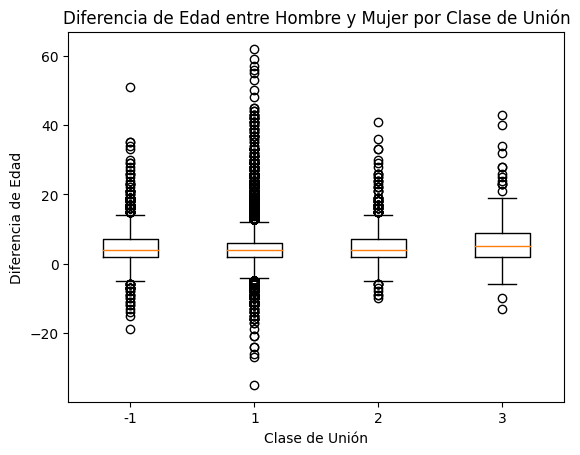

In [6]:
# Diferencia de edad entre el hombre y la mujer por clase de Union

df_difference_age = data_final[(data_final['edadHombre'] < 18 ) | (data_final['edadMujer'] < 18 )]

df_difference_age = df_difference_age[['edadHombre', 'edadMujer', 'claseUnion']]

df_difference_age['diferenciaEdad'] = df_difference_age['edadHombre'] - df_difference_age['edadMujer']

fig, ax = plt.subplots()

grouped = df_difference_age.groupby('claseUnion')['diferenciaEdad']

# Generar el diagrama de caja y bigotes para cada clase de unión
ax.boxplot([grouped.get_group(group) for group in grouped.groups], labels=grouped.groups)
ax.set_xlabel('Clase de Unión')
ax.set_ylabel('Diferencia de Edad')
ax.set_title('Diferencia de Edad entre Hombre y Mujer por Clase de Unión (Menores de edad)')
plt.show()

Como se podra observar suelen casarse entre unos 3, 4 o más años de diferencia. Se puede apreciar que el tipo de union de matrimonio "Comunidad de gananciales" es el tipo de unión donde existe más diferencia y más variedad.

## Correlación entre variables

C:\Users\sarap\AppData\Local\Temp\ipykernel_15052\4160710500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_final.corr(),annot=True,fmt="f").set_title("Correlación de las variables")


Text(0.5, 1.0, 'Correlación de las variables')

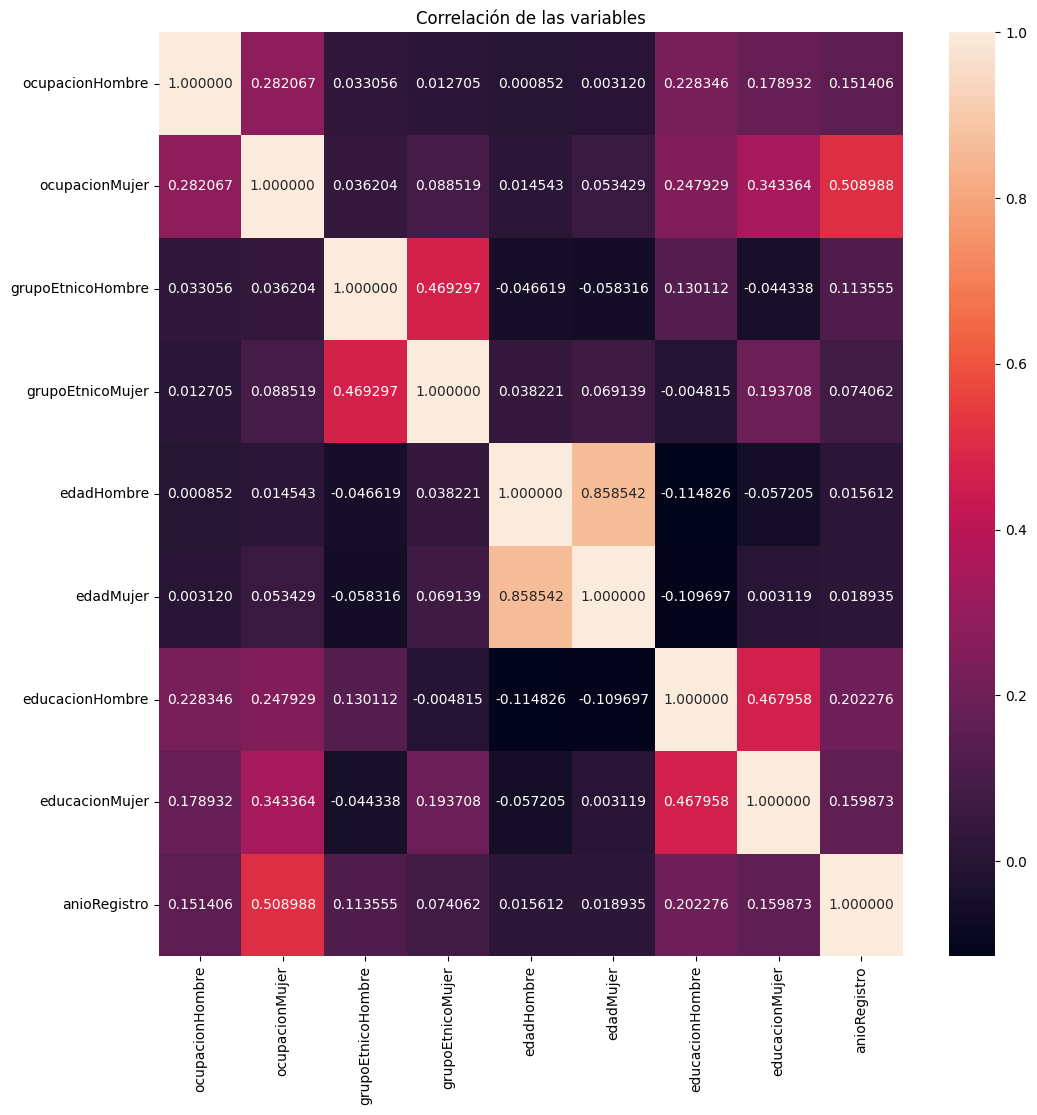

In [44]:
plt.subplots(figsize = (12,12))
sns.heatmap(data_final.corr(),annot=True,fmt="f").set_title("Correlación de las variables")

In [45]:
data_final.corr()

C:\Users\sarap\AppData\Local\Temp\ipykernel_15052\1212900781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_final.corr()


,ocupacionHombre,ocupacionMujer,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,anioRegistro
ocupacionHombre,1.000000,0.282067,0.033056,0.012705,0.000852,0.003120,0.228346,0.178932,0.151406
ocupacionMujer,0.282067,1.000000,0.036204,0.088519,0.014543,0.053429,0.247929,0.343364,0.508988
grupoEtnicoHombre,0.033056,0.036204,1.000000,0.469297,-0.046619,-0.058316,0.130112,-0.044338,0.113555
grupoEtnicoMujer,0.012705,0.088519,0.469297,1.000000,0.038221,0.069139,-0.004815,0.193708,0.074062
edadHombre,0.000852,0.014543,-0.046619,0.038221,1.000000,0.858542,-0.114826,-0.057205,0.015612
edadMujer,0.003120,0.053429,-0.058316,0.069139,0.858542,1.000000,-0.109697,0.003119,0.018935
educacionHombre,0.228346,0.247929,0.130112,-0.004815,-0.114826,-0.109697,1.000000,0.467958,0.202276
educacionMujer,0.178932,0.343364,-0.044338,0.193708,-0.057205,0.003119,0.467958,1.000000,0.159873
anioRegistro,0.151406,0.508988,0.113555,0.074062,0.015612,0.018935,0.202276,0.159873,1.000000


## Coeficiente de Hopksins
### Agrupamiento data de hombres

In [46]:
random.seed(123)
X_hombre = np.array(data_final[["edadHombre","educacionHombre", "grupoEtnicoHombre"]])
X_scale_hombre = sklearn.preprocessing.scale(X_hombre)

pyclustertend.hopkins(X_scale_hombre, len(X_scale_hombre))


8.484859427585364e-05

El valor del coeficiente de Hopkins (8.484859427585364e-05) es muy cercano a 0 lo cual indica que los datos se pueden agrupar de forma efectiva.